In [ ]:
Nombre: Cristian Valdés Encina

Generación: G42

Profesores: Heriberto García- Juan Pablo Ramírez

Hito 4 - Base de datos income-db.csv. 

Una sección llamada Descripción donde se generará un análisis descriptivo considerando el tipo de variables (desde el punto de vista estadístico así como computacional). Esta sección debe considerar medidas univariadas/ frecuencias, datos perdidos y gráficos distributivos sobre las variables a analizar. A partir de ésta se debe clarificar la estrategia de preprocesamiento (datos perdidos, recodificaciones).

# Preprocesamiento de los datos 

In [ ]:
Aspectos adicionales a considerar:

● La base de datos contiene los valores perdidos como ? . Deberá transformarlos para
poder trabajar de forma adecuada.

● Desde la organización le sugieren que debe recodificar las siguientes variables
acorde a las siguientes nomenclaturas:

○ occupation debe recodificarse como collars siguiendo una nomenclatura
similar a:
■ white-collar ← Prof-specialty, Exec-managerial, Adm-clerical,
Sales, Tech-support.
■ blue-collar ← Craft-repair, Machine-op-inspct, Transport-moving,
Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
■ others ← Other-service, Armed-Forces.

○ workclass debe recodificarse como workclass_recod siguiendo una
nomenclatura similar a :
■ federal-gov ← Federal-gov.
■ state-level-gov ← State-gov, Local-gov.
■ self-employed ← Self-emp-inc, Self-emp-not-inc
■ unemployed ← Never-worked, Without-pay.

○ education debe recodificarse como educ_recod siguiendo una
nomenclatura similar a :
■ preschool ← Preschool
■ elementary-school ← 1st-4th, 5th-6th
■ high-school ← 7th-8th, 9th, 10th,11th, 12th, HS-grad
■ college ← Assoc-voc, Assoc-acdm, Some-college
■ university ← Bachelors, Masters, Prof-school, Doctorate.

○ marital-status debe recodificarse como civstatus siguiendo una
nomenclatura similar a :
■ married ← Married-civ-spouse, Married-spouse-absent,
Married-AF-spouse.
■ divorced ← Divorced.
■ separated ← Separated.
■ widowed ← Widowed.

○ native-country debe recodificarse como region donde cada país debe
asignarse a uno de los 5 continentes.

○ income debe recodificarse de forma binaria.

In [1]:
#librerías manipulacion de preprocesamiento y visualización datos y gráficos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#librerías de regresión lineal y modelación econométrica
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Importe de métricas para análisis del modelo utilizando machine learning
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

#Métricas de evaluación del modelo utilizando machine learning
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


# Módulos para análisis de dimensionalidad
import factor_analyzer as factor
import missingno as msgn

#Especificaciones
import warnings
warnings.filterwarnings(action="ignore")
plt.style.use("seaborn-whitegrid")

In [920]:
df = pd.read_csv("income-db.csv")

In [921]:
df["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

# Cambio de los datos pérdidos por NAN

In [922]:
df["workclass"] = df["workclass"].replace("?", np.nan)

In [923]:
df["native-country"] = df["native-country"].replace("?", np.nan)

In [924]:
df["occupation"] = df["occupation"].replace("?", np.nan)

In [925]:
df = df.dropna(subset=["workclass"])# eliminacion de los datos perdidos de la columna workclass

In [926]:
df.shape # comprobación eliminacion de columnas nan, correspondiente a workclass

(46043, 15)

In [927]:
df = df.dropna(subset=["native-country"])#eliminacion de los datos perdidos de la columna native-country

In [928]:
df.shape# comprobación eliminación de columnas nan, correspondiente a "native-country"

(45232, 15)

In [929]:
df = df.dropna(subset=["occupation"])#eliminacion de los datos perdidos de la columna occupation

In [930]:
df.shape# comprobación de eliminación de columnas nan, correspondiente a "ocupation"

(45222, 15)

# Recodificación para workclass

○ workclass debe recodificarse como workclass_recod siguiendo una
nomenclatura similar a :
■ federal-gov ← Federal-gov.
■ state-level-gov ← State-gov, Local-gov.
■ self-employed ← Self-emp-inc, Self-emp-not-inc
■ unemployed ← Never-worked, Without-pay.

In [931]:
df = df.rename(columns = {'workclass': 'workclass_recod'}) 

In [932]:
df.sample()

,age,workclass_recod,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
3463,37,Federal-gov,127879,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Female,0,0,40,United-States,<=50K


In [933]:
df["workclass_recod"].value_counts() # matriz antes del replace para workclass_recod

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass_recod, dtype: int64

In [934]:
df["workclass_recod"] = df["workclass_recod"].replace(["State-gov", "Local-gov"],"state-level-gov")
df["workclass_recod"] = df["workclass_recod"].replace(["Self-emp-inc", "Self-emp-not-inc"],"self-employed")
df["workclass_recod"] = df["workclass_recod"].replace(["Never-worked", "Without-pay"],"unemployed")
df["workclass_recod"] = df["workclass_recod"].replace("Federal-gov","federal-gov")

In [935]:
df["workclass_recod"].value_counts()

Private            33307
self-employed       5442
state-level-gov     5046
federal-gov         1406
unemployed            21
Name: workclass_recod, dtype: int64

# Recodificación para native-country 

○ native-country debe recodificarse como region donde cada país debe
asignarse a uno de los 5 continentes.

In [936]:
df["native-country"].value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

In [937]:
df = df.rename(columns = {'native-country': 'region'}) 

In [938]:
df["region"] = df["region"].replace(["United-States", "Mexico", "Puerto-Rico","Canada","El-Salvador","Cuba", "Jamaica", 
                                     "Dominican-Republic","Guatemala","Columbia","Haiti","Nicaragua","Peru",
                                    "Ecuador","Trinadad&Tobago","Honduras",
                                     "Outlying-US(Guam-USVI-etc)"],"america")

In [939]:
df["region"] = df["region"].replace(["Germany", "England", "Poland", "Portugal","Greece","Italy",
                                    "Ireland","France","Yugoslavia","Scotland","Hungary",
                                    "Holand-Netherlands"],"europa")

In [940]:
df["region"] = df["region"].replace(["Philippines","India","China","South","Japan",
                                    "Vietnam","Taiwan","Thailand","Hong","Cambodia","Laos", "Iran"],"asia")

In [941]:
df.region.value_counts() #Corroboración de la nuevas columnas

america    43453
asia        1031
europa       738
Name: region, dtype: int64

# Recodificación para occupation 

○ occupation debe recodificarse como collars siguiendo una nomenclatura
similar a:
■ white-collar ← Prof-specialty, Exec-managerial, Adm-clerical,
Sales, Tech-support.
■ blue-collar ← Craft-repair, Machine-op-inspct, Transport-moving,
Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv.
■ others ← Other-service, Armed-Forces.

In [942]:
df = df.rename(columns = {'occupation': 'collars'}) 

In [943]:
df["collars"] = df["collars"].replace(["Prof-specialty", "Exec-managerial", "Adm-clerical",
                                     "Sales", "Tech-support"],"white-collar")

In [944]:
df["collars"] = df["collars"].replace(["Craft-repair", "Machine-op-inspct", "Transport-moving",
                                       "Handlers-cleaners", "Farming-fishing", 
                                       "Protective-serv", "Priv-house-serv"],"blue-collar")

In [945]:
df["collars"] = df["collars"].replace(["Other-service", "Armed-Forces"],"others")

In [946]:
df.collars.value_counts() #Corroboración de la nuevas columnas

white-collar    24360
blue-collar     16040
others           4822
Name: collars, dtype: int64

# Recodificación para education

○ education debe recodificarse como educ_recod siguiendo una
nomenclatura similar a :
■ preschool ← Preschool
■ elementary-school ← 1st-4th, 5th-6th
■ high-school ← 7th-8th, 9th, 10th,11th, 12th, HS-grad
■ college ← Assoc-voc, Assoc-acdm, Some-college
■ university ← Bachelors, Masters, Prof-school, Doctorate.

In [947]:
df = df.rename(columns = {'education': 'educ_recod'}) 

In [948]:
df["educ_recod"] = df["educ_recod"].replace(["Preschool"],"preschool")

In [949]:
df["educ_recod"] = df["educ_recod"].replace(["1st-4th","5th-6th"],"elementary-school")

In [950]:
df["educ_recod"] = df["educ_recod"].replace(["7th-8th","9th","10th","11th","12th","HS-grad"],"high-school")

In [951]:
df["educ_recod"] = df["educ_recod"].replace(["Assoc-voc","Assoc-acdm","Some-college"],"college")

In [952]:
df["educ_recod"] = df["educ_recod"].replace(["Bachelors","Masters","Prof-school","Doctorate"],"university")

In [953]:
df.educ_recod.value_counts()#Corroboración de la nuevas columnas

high-school          19701
college              13365
university           11413
elementary-school      671
preschool               72
Name: educ_recod, dtype: int64

# Recodificación para marital-statu

○ marital-status debe recodificarse como civstatus siguiendo una
nomenclatura similar a :
■ married ← Married-civ-spouse, Married-spouse-absent,
Married-AF-spouse.
■ divorced ← Divorced.
■ separated ← Separated.
■ widowed ← Widowed.

In [954]:
df = df.rename(columns = {'marital-status': 'civstatus'}) #Corroboración de la nuevas columnas

In [955]:
df["civstatus"] = df["civstatus"].replace(["Married-civ-spouse", "Married-spouse-absent",
                                           "Married-AF-spouse"],"married")

In [956]:
df["civstatus"] = df["civstatus"].replace(["Divorced"],"divorced")

In [957]:
df["civstatus"] = df["civstatus"].replace(["Separated"],"separated")

In [958]:
df["civstatus"] = df["civstatus"].replace(["Widowed"],"widowed")

In [959]:
df.civstatus.value_counts()

married          21639
Never-married    14598
divorced          6297
separated         1411
widowed           1277
Name: civstatus, dtype: int64

# Recodificación para income

○ income debe recodificarse de forma binaria.

In [960]:
df.income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [961]:
df["income"] = np.where(df['income']=='>50K',1, 0)

In [962]:
df["gender"] = np.where(df['gender']=='Female',1, 0)

In [963]:
df.gender.value_counts()

0    30527
1    14695
Name: gender, dtype: int64

In [964]:
df.income.value_counts()#Corroboración de la nuevas columnas

0    34014
1    11208
Name: income, dtype: int64

In [965]:
df.head(n=5)

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,0,0,0,40,america,0
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,0,0,0,50,america,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,0,0,0,40,america,1
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,0,7688,0,40,america,1
5,34,Private,198693,high-school,6,Never-married,others,Not-in-family,White,0,0,0,30,america,0


In [966]:
df.info()#Corroboración de los cambios en el dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass_recod  45222 non-null  object
 2   fnlwgt           45222 non-null  int64 
 3   educ_recod       45222 non-null  object
 4   educational-num  45222 non-null  int64 
 5   civstatus        45222 non-null  object
 6   collars          45222 non-null  object
 7   relationship     45222 non-null  object
 8   race             45222 non-null  object
 9   gender           45222 non-null  int32 
 10  capital-gain     45222 non-null  int64 
 11  capital-loss     45222 non-null  int64 
 12  hours-per-week   45222 non-null  int64 
 13  region           45222 non-null  object
 14  income           45222 non-null  int32 
dtypes: int32(2), int64(6), object(7)
memory usage: 5.2+ MB


# Descripción y comportamiento de las variables continuas

In [785]:
def plot_hist(df, columna):
    tmp = df[columna].dropna() # elimna los valores NAN
    plt.hist(tmp, color="black", alpha=.6) # genera el grafico incorporando la serie tmp
    plt.title(columna)# nombre de la serie o columna
    plt.axvline(np.mean(tmp), color= "red", label= "Media") # grafica la vertical que representa la media de la submuestra
    plt.axvline(np.median(df[columna]), color= "blue", label = "Median")  # grafica la vertical que representa la media del total de la muestra
    plt.legend() # asi imprime las observaciones de label


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

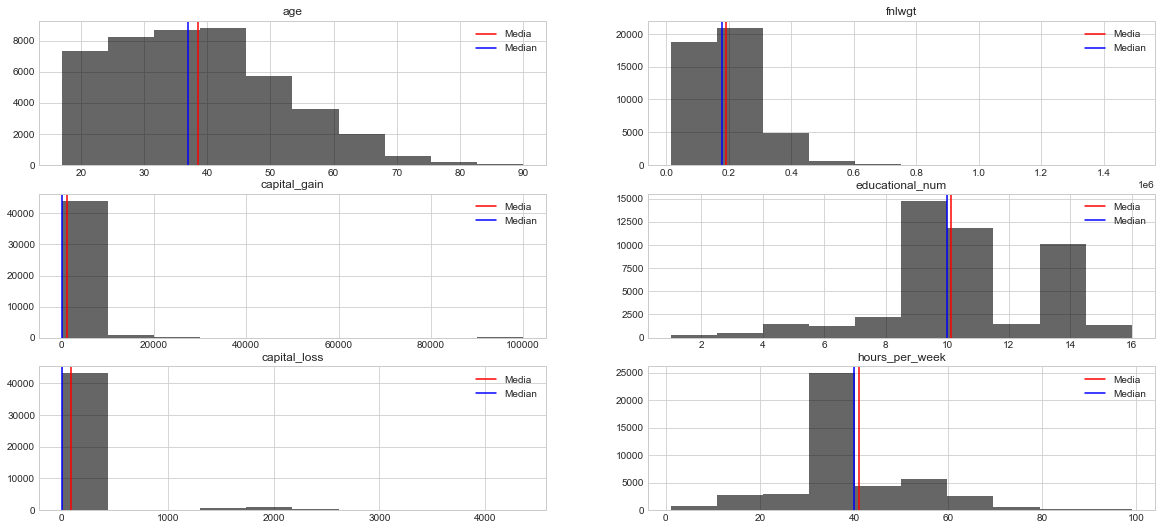

In [786]:
plt.figure(figsize=(20,9))
lista =['age','fnlwgt','capital_gain', 'educational_num','capital_loss', 'hours_per_week']

for i,j in enumerate(lista):
    plt.subplot(3,2,i+1)
    plot_hist(df,j)

plt.tight_layout


Comentario:

Age: evidencia que la edad promedio de los encuestados corresponde a los 40 años,la mayor concentración de los datos
se produce entre los 30 y 50 años, decreciendo porteriormente.  
Capital_gain presenta en promedio valores cercano a 0 indicando que la mayor parte de los encuestados no genera grandes cantidades de ingreso por inversiones fuera del trabajo. Una intepretacion similar se desprende para capital_loss(pérdidas generadas por inversiones fuera del trabajo asalariado).
Educational_num no esta explicado en el modelo de la prueba, pero muy probablemente corresponde a los años de estudio de los encuestados, presenta un promedio de 10 años seguido por el intervalo de 10-12 y 13-14 años. Finalmente, la cantidad de horas trabajadas por semana(hours_per_week) presenta un promedio de 42, concentrandose en el grueso de los datos en un rango de 30-40 horas. 


# Gráficos de dispersión para los datos del tipo object

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

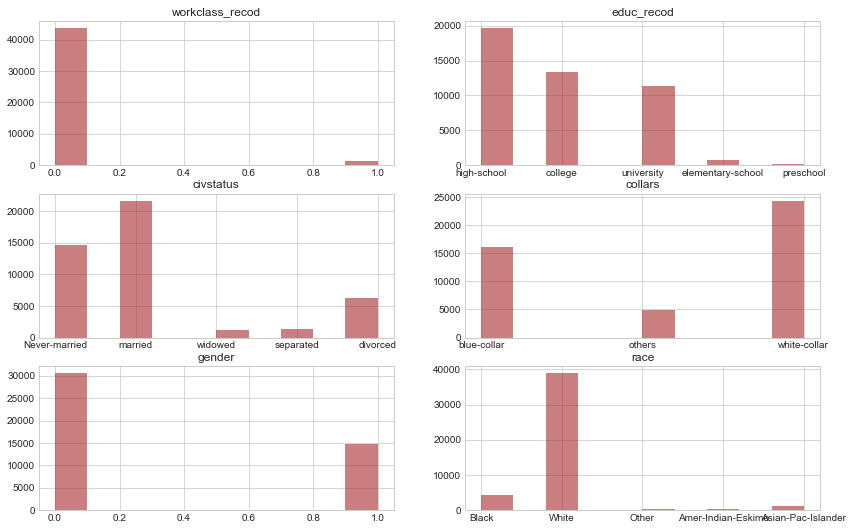

In [787]:
lista_2 = ["workclass_recod","educ_recod","civstatus","collars","gender","race"]

plt.figure(figsize=(14,9))
#lt.tight_layout
for i,j in enumerate(lista_2):
    plt.subplot(3,2,i+1)
    plt.hist(df[j], alpha= .6 , color= 'brown')
    plt.title(j)
plt.tight_layout

Comentario: Para "workclass_recod" la clase con mayor frecuencia de los datos corresponde al tipo privado. Respecto a la eduación la mayor cantidad de los datos se distribuye entre las clases high-school y college, seguido por universitarios.
Respescto a la situacion marital, la mayor clase corresponde a las personas casadas, seguidos por los que nunca se han casado.
El genero de los encuestados esta principlamente compuesto por la clase hombre, los que doblan a la cantidad de mujeres. Finalmente, la raza que esta mayormente representada se identifica con la blanca, seguida por la raza negra correspondiente a 1/4 de la antes mencionada.

# Diagrama de dispersión para variable objeivo

Text(0, 0.5, 'Frecuencia')

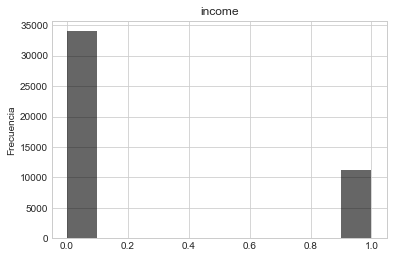

In [788]:
plt.hist(df["income"], alpha= .6 , color= 'black')
plt.title("income")
plt.ylabel("Frecuencia")

Comentario: income se representa por dos clases: 0 y 1. La clase 0 corresponde a sueldos menores a 50k, estos representan en la muestra más del 70% de los casos, lo que nos indica que el grueso de los trabajadores percibe ingresos anuales menores o iguales a 50k.

# Modelación descriptiva

In [ ]:
Una sección llamada Modelación descriptiva, que buscará definir cuáles son los principales determinantes del objeto de estudio. 
En base a esta sección se podrá construír o depurar el modelo predictivo.

-Objetivo
● Completar el punto de Modelación descriptiva.
Elementos a considerar
● La modelación mediante regresión de ambos problemas. (2 Puntos)
● La interpretación de los principales regresores en cada problema. (2 Puntos)
● La definición de las estrategias de Modelación predictiva. (1 Punto)
● Entregable: Dos notebooks (uno por enunciado) con todos los puntos

In [789]:
df.columns

Index(['age', 'workclass_recod', 'fnlwgt', 'educ_recod', 'educational_num',
       'civstatus', 'collars', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'region', 'income'],
      dtype='object')

# INCOME. Si el individuo percibe ingresos inferiores a 50.000 dólares anuales,>50K si el individuo percibe ingresos superiores a 50.000 dólares anuales. Este es su vector objetivo .

In [790]:
#existen problemas para las columnas nombradas con guiones se cambiará el signo "-", por el guión bajo en las columnas 
#correspondientes: 'capital-gain', 'capital-loss', 'hours-per-week' y 'educational-num'.

In [967]:
df = df.rename(columns = {'capital-gain': 'capital_gain'}) 

In [968]:
df = df.rename(columns = {'capital-loss': 'capital_loss'}) 

In [969]:
df = df.rename(columns = {'hours-per-week': 'hours_per_week'}) 

In [970]:
df = df.rename(columns = {'educational-num': 'educational_num'}) 

In [971]:
# Creamos las variables binarias para las variables NOMINALES!
#Creamos las variables binarias con el método get_dummies y ajustamos el 
#argumento drop_first a True para eliminar primera variable y evitar así los problemas de redundancia.

In [972]:
df["workclass_recod"] = pd.get_dummies(df['workclass_recod'], drop_first = True)

In [973]:
df["educ_recod"] = pd.get_dummies(df['educ_recod'], drop_first = True)

In [974]:
df["educ_recod"].value_counts() 

0    44551
1      671
Name: educ_recod, dtype: int64

In [975]:
df["civstatus"] = pd.get_dummies(df['civstatus'], drop_first = True)

In [976]:
df["collars"] = pd.get_dummies(df['collars'], drop_first = True)

In [977]:
df["relationship"] = pd.get_dummies(df['relationship'], drop_first = True)

In [978]:
df["race"] = pd.get_dummies(df['race'], drop_first = True)

In [979]:
df["region"] = pd.get_dummies(df['region'], drop_first = True)

In [980]:
df.region.value_counts()

0    44191
1     1031
Name: region, dtype: int64

In [886]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45222 non-null  int64
 1   workclass_recod  45222 non-null  uint8
 2   fnlwgt           45222 non-null  int64
 3   educ_recod       45222 non-null  uint8
 4   educational_num  45222 non-null  int64
 5   civstatus        45222 non-null  uint8
 6   collars          45222 non-null  uint8
 7   relationship     45222 non-null  uint8
 8   race             45222 non-null  uint8
 9   gender           45222 non-null  int32
 10  capital_gain     45222 non-null  int64
 11  capital_loss     45222 non-null  int64
 12  hours_per_week   45222 non-null  int64
 13  region           45222 non-null  uint8
 14  income           45222 non-null  int32
dtypes: int32(2), int64(6), uint8(7)
memory usage: 3.1 MB


# Mpdelación. Regresión logística para el modelar la variable categórica objetivo "income"

In [981]:
ml_logit= smf.logit("income~age+workclass_recod+fnlwgt+educ_recod+capital_gain+capital_loss+hours_per_week+educational_num+civstatus+collars+relationship+race+gender+region",df).fit()# para que el modelo se ajuste a los datos
ml_logit.summary()

Optimization terminated successfully.
         Current function value: 0.371994
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45207
Method:                           MLE   Df Model:                           14
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.3357
Time:                        14:37:27   Log-Likelihood:                -16822.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.8489      0.110    -71.498      0.000      -8.064      -7.634
age                 0.0430      0.001     37.964      0.000       0.041       0.045
workclass_recod     0.5279      0.069      7.651      0.000       0.393       0.663
fnlwgt           5.686e-07   1.31e-07      4.334      0.000    3.11e-07    8.26e-07
educ_recod          0.5305      0.206      2.576      0.010       0.127       0.934
capital_gain        0.0003   8.44e-06     38.510      0.000       0.000       0.000
capital_loss        0.0007   2.91e-05     23.482      0.000       0.001       0.001
hours_per_week      0.0337      0.001     27.698      0.000       0.031       0.036
educational_num     0.3566      0.006     55.522      0.000       0.344       0.369
civstatus          -0.8950      0.054    -16.438      0.000      -1.002      -0.788
collars            -1.1962      0.081    -14.699      0.000      -1.356      -1.037
relationship       -1.4161      0.041    -34.186      0.000      -1.497      -1.335
race                0.0520      0.121      0.431      0.667      -0.185       0.289
gender             -0.7388      0.036    -20.446      0.000      -0.810      -0.668
region             -0.2785      0.136     -2.048      0.041      -0.545      -0.012
===================================================================================
"""

Se eliminarán todos los estadísticos menores a 1,96 y p-value > 0.05:

-Variables significantes para el modelo:son todas menos "race"


In [982]:
ml_logit= smf.logit("income~age+workclass_recod+fnlwgt+educ_recod+capital_gain+capital_loss+hours_per_week+educational_num+civstatus+collars+relationship+gender",df).fit()# para que el modelo se ajuste a los datos
ml_logit.summary()

Optimization terminated successfully.
         Current function value: 0.372073
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                45222
Model:                          Logit   Df Residuals:                    45209
Method:                           MLE   Df Model:                           12
Date:                Mon, 11 Apr 2022   Pseudo R-squ.:                  0.3355
Time:                        14:37:39   Log-Likelihood:                -16826.
converged:                       True   LL-Null:                       -25322.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -7.8374      0.110    -71.499      0.000      -8.052      -7.623
age                 0.0430      0.001     37.987      0.000       0.041       0.045
workclass_recod     0.5285      0.069      7.661      0.000       0.393       0.664
fnlwgt           5.694e-07   1.31e-07      4.346      0.000    3.13e-07    8.26e-07
educ_recod          0.5158      0.206      2.504      0.012       0.112       0.920
capital_gain        0.0003   8.44e-06     38.522      0.000       0.000       0.000
capital_loss        0.0007   2.91e-05     23.465      0.000       0.001       0.001
hours_per_week      0.0337      0.001     27.714      0.000       0.031       0.036
educational_num     0.3549      0.006     55.617      0.000       0.342       0.367
civstatus          -0.8920      0.054    -16.393      0.000      -0.999      -0.785
collars            -1.2036      0.081    -14.792      0.000      -1.363      -1.044
relationship       -1.4130      0.041    -34.139      0.000      -1.494      -1.332
gender             -0.7387      0.036    -20.448      0.000      -0.809      -0.668
===================================================================================
"""

# Interpretación de los principales regresores en cada problema

-Valor p ≤ α: La asociación es estadísticamente significativa

Si el valor p es menor o igual al nivel de significación, puede concluir que existe una asociación estadísticamente significativa entre la variable de respuesta y el término. Una vez depurado el modelo se cumple que los todos p-value son menor a 0.05, tanto para variables continuas como discretas. Si un predictor continuo es significativo, se puede concluir que el coeficiente del predictor no es igual a cero, lo que se cumple para educ_recod,hours_per_week,educational_num. Pero no para capital_loss	y capital_gain con valores aprox. 0.

Si un predictor categórico es significativo, puede concluir que no todas las medias de nivel son iguales cumpliendose para: 
civstatus, collars, relationship, gender, workclass_recod.

Sabemos por teoría que cuanto mayor sea la desviación R2, mejor se ajustará el modelo a sus datos. La desviación R2 siempre está entre 0% y 100%. Pseudo R-squ siempre aumentará al agregar predictores adicionales a un modelo. Para nuestro modelo solo fue eliminado un predictor "race" por lo que prácticamente no varió su valor, manteniendo el valor 0.34. 


# Cálculo mediante el coeficiente de cada variable para generar odds ratio del modelo

In [891]:
print (np.exp(ml_logit.params))

Intercept          0.000395
age                1.043952
workclass_recod    1.696454
fnlwgt             1.000001
educ_recod         1.674975
capital_gain       1.000325
capital_loss       1.000684
hours_per_week     1.034284
educational_num    1.426030
civstatus          0.409824
collars            0.300099
relationship       0.243405
gender             0.477742
dtype: float64


Comentario: Los odds ratio indican la relación que existe con respecto a la variable dependiente.Si el valor es mayor que 1, entonces indica que a medida que aumenta el predictor(variable dependiente), las probabilidades de los resultados aumentan. A la inversa, un valor menor que 1 indica que a medida que aumenta el predictor, las probabilidades de los resultados disminuyen.
Si es 1, el predictor no tienen relación con la probabilidad de ocurrencia de la variable dependiente.

De acuerdo con lo anterior, el valor 1 corresponde a las variables:age,fnlwgt, capital_gain,capital_loss,hours_per_week, los que NO afectarían la probabilidad de ocurrencia de income (mayor a 50k/1- mayor a 50k).

Las variables con valores mayor a 1, es decir, variables o predictores que al incrementarse aumentan la probabilidad de ocurrencia de income: son: workclass_recod,educ_recod, educational_num.

Las variables con valores menor a 1, es decir, variables o predictores que al aumentar disminuyen la probabilidad de ocurrencia de income: son: civstatus,collars,relationship, gender.     


# Definición de las estrategias de Modelación predictiva

El conjunto de pasos para una estrategia de modelación predictiva son los siguientes:

1) Generar subconjuntos de entrenamiento y pruebas

2) Estandarizar las matrices de atributos de entrenamiento y pruebas: mediante la estandarización transformamos las variables al restarle la media y dividirla por la varianza de la variable con esto logramos homogeneizar las variables y facilitar la comparación entre atributos en el modelo logístico.

3) Importar de métricas para análisis del modelo: exactitud, precision, sensibilidad y F1. Exactitud: mide los casos correctamente predichos del total de observaciones Precisión: mide la fracción de predicciones correctas entre las etiquetas positivas Sensibilidad o Recall: mide la fracción de verdaderos positivos predichos por el modelo F1: representa la media armónica entre Precision y Recall.

4) Matriz de confusión y corroboración con pd.crosstab: permite visualizar los verdaderos positivos, falsos positivos, verdadero negativo, falso negativo.

5) Determinar gráficamente la curva Receiver Operator Characteristic (ROC): visualizacion grafica de la capacidad predictiva del modelo,predecir más verdaderos positivos que falsos positivos.

6) Determinar área bajo de la curva la ROC: valor cuantitativo que permite determinar el desempeño del modelo predictivo.

# Hito 4

Objetivo

● Completar el punto de Modelación predictiva.
Elementos a considerar
● La preparación del ambiente de trabajo (imports, separación de muestras) para
implementar modelos de predicción. (1 Punto)
● La implementación de por lo menos tres modelos predictivos. (2 Puntos)
● El reporte del mejor modelo predictivo en base a los resultados. (2 Puntos)
● Entregable: Dos notebooks (uno por enunciado) con todos los puntos detallados e
interpretados. De ser necesario, un archivo con extensión .py con todas las
funciones implementadas.

In [ ]:
Una sección llamada Modelación predictiva , donde se implementará una solución
analítica que aumente las métricas de desempeño. Se solicitan por lo menos 3
modelos predictivos, donde deberán reportar las principales métricas. Cada modelo
predictivo debe tener una reseña sobre el por qué se diseño de esa forma.

# Preparación del ambiente de trabajo (imports, separación de muestras) para implementar modelos de predicción. (1 Punto)

# Modelo predictivo para modelo "income" sin depurar

In [983]:
y = df.income
X = df.drop(columns=["income"])

In [984]:
#A partir del modelo no depurado, se generará un modelo predictivo 
# Subconjuntos de entrenamiento y pruebas, separando el 33% de la muestra en el conjunto de pruebas.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .33 , random_state= 11238)

In [985]:
X_train.shape

(30298, 14)

In [986]:
X_test.shape

(14924, 14)

In [987]:
y_train.shape

(30298,)

In [988]:
y_test.shape

(14924,)

In [912]:
df.region = df.region.astype(np.int64)

In [989]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45222 non-null  int64
 1   workclass_recod  45222 non-null  uint8
 2   fnlwgt           45222 non-null  int64
 3   educ_recod       45222 non-null  uint8
 4   educational_num  45222 non-null  int64
 5   civstatus        45222 non-null  uint8
 6   collars          45222 non-null  uint8
 7   relationship     45222 non-null  uint8
 8   race             45222 non-null  uint8
 9   gender           45222 non-null  int32
 10  capital_gain     45222 non-null  int64
 11  capital_loss     45222 non-null  int64
 12  hours_per_week   45222 non-null  int64
 13  region           45222 non-null  uint8
 14  income           45222 non-null  int32
dtypes: int32(2), int64(6), uint8(7)
memory usage: 3.1 MB


In [990]:
# ● Estandarice las matrices de atributos de entrenamiento y pruebas usando
# StandardScaler() ajustado solo sobre el conjunto de entrenamiento.

#Estandarizamos cada atributo en nuestras muestras mediante StandardScaler en el módulo sklearn.preprocessing . 
#Mediante la estandarización transformamos las variables al restarle la media y dividirla por la varianza de la variable.
#Con esto logramos homogeneizar las variables y facilitar la comparación entre atributos en el modelo logístico.
from sklearn.preprocessing import StandardScaler

# estandarizamos la matriz de entrenamiento
X_train_std = StandardScaler().fit_transform(X_train)

# estandarizamos la matriz de prueba
X_test_std = StandardScaler().fit_transform(X_test)

# iniciamos el modelo con la clase LogisticRegression y pasamos los datos en fit.
new_model = LogisticRegression().fit(X_train_std, y_train)

In [991]:
# ● Predicción de las clases y de la probabilidad.

# Predicciones para el conjunto de datos

yhat = new_model.predict(X_test_std)

yhat[:100]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

# Reporte del modelo predictivo en base a los resultados Modelo sin depurar

In [992]:
# Nivel de exactitud
accuracy = accuracy_score(y_test,yhat)
accuracy

0.8264540337711069

In [993]:
# NIVEL DE PRECISION
precision_model = precision_score(y_test,yhat)
precision_model

0.7282521947326417

In [994]:
#Valor de recall 
recall_model = recall_score(y_test, yhat)
recall_model

0.48875200856989826

In [995]:
#F1-score
F1_model = f1_score(y_test, yhat)
F1_model

0.5849358974358975

In [996]:
m1_confusion = confusion_matrix(y_test, yhat)
m1_confusion

array([[10509,   681],
       [ 1909,  1825]], dtype=int64)

In [997]:
# comparemos con pd.crosstab
m1_conf_pd = pd.crosstab(y_test, yhat)
m1_conf_pd

col_0,0,1
income,,
0,10509,681
1,1909,1825


In [998]:
# Curva ROC de modelo no depurado
#reestimamos los valores predichos de nuestro modelo para obtener laprobabilidad entre 0 y 1.
yhat_predic_proba = new_model.predict_proba(X_test_std)[:, 1 ]

In [1000]:
# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test, yhat_predic_proba)

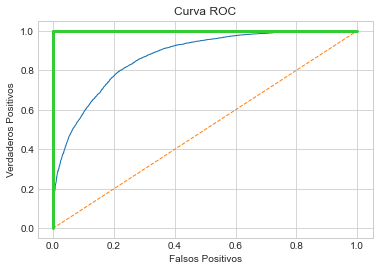

In [1001]:
# Plot ROC curve
plt.title( 'Curva ROC' )
plt.plot(false_positive, true_positive, lw= 1 )#posicion x, y
plt.plot([ 0 , 1 ], ls= "--" , lw= 1 ) # bisectriz
plt.plot([ 0 , 0 ], [ 1 , 0 ] , c= 'limegreen' , lw= 3 ), plt.plot([ 1 , 1 ] ,c= 'limegreen' , lw= 3 )
plt.ylabel( 'Verdaderos Positivos' )
plt.xlabel( 'Falsos Positivos' );

In [1002]:
#Para área debajo de la curva utilizamos el método roc_auc_score en el módulo
#metrics de sklearn . De manera similar a las implementaciones de métricas previas con
#sklearn , el método solicita el vector objetivo verdadero ( y_test ) y nuestras predicciones
#en base al modelo ( yhat ).
roc_auc_score(y_test, yhat)

0.7139470498613566

# Modelo Predictivo Depurado 1

In [1062]:
y_1 = df.income
X_1 = df.drop(columns=["income", "race"])

In [1063]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size= .33 , random_state= 11238)

In [1068]:
# ● Estandarice las matrices de atributos de entrenamiento y pruebas usando
# StandardScaler() ajustado solo sobre el conjunto de entrenamiento.

#Estandarizamos cada atributo en nuestras muestras mediante StandardScaler en el módulo sklearn.preprocessing . 
#Mediante la estandarización transformamos las variables al restarle la media y dividirla por la varianza de la variable.
#Con esto logramos homogeneizar las variables y facilitar la comparación entre atributos en el modelo logístico.
from sklearn.preprocessing import StandardScaler

# estandarizamos la matriz de entrenamiento
X_train_std_1 = StandardScaler().fit_transform(X_train_1)

# estandarizamos la matriz de prueba
X_test_std_1 = StandardScaler().fit_transform(X_test_1)

# iniciamos el modelo con la clase LogisticRegression y pasamos los datos en fit.
new_model_1 = LogisticRegression().fit(X_train_std_1, y_train_1)

In [1069]:
# ● Predicción de las clases y de la probabilidad.

# Predicciones para el conjunto de datos

yhat_1 = new_model_1.predict(X_test_std_1)

yhat_1[:100]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

# Reporte del modelo predictivo en base a los resultados, Modelo depurado 1

In [1101]:
# Nivel de exactitud
accuracy = accuracy_score(y_test_1,yhat_1)
accuracy

0.8264540337711069

In [1071]:
# NIVEL DE PRECISION
precision_model = precision_score(y_test_1,yhat_1)
precision_model

0.7282521947326417

In [1072]:
#Valor de recall 
recall_model = recall_score(y_test_1, yhat_1)
recall_model

0.48875200856989826

In [1094]:
#F1-score
F1_model = f1_score(y_test_1, yhat_1)
F1_model

0.5849358974358975

In [1074]:
# comparemos con pd.crosstab
m1_conf_pd = pd.crosstab(y_test_1, yhat_1)
m1_conf_pd

col_0,0,1
income,,
0,10509,681
1,1909,1825


In [1075]:
# Curva ROC de modelo no depurado
#reestimamos los valores predichos de nuestro modelo para obtener laprobabilidad entre 0 y 1.
yhat_predic_proba = new_model_1.predict_proba(X_test_std_1)[:, 1 ]

In [1090]:
# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test_1, yhat_predic_proba)

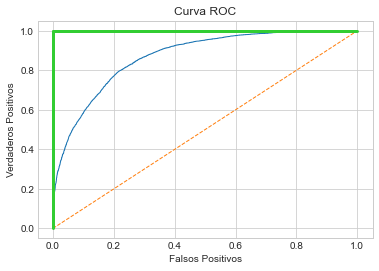

In [1091]:
# Plot ROC curve
plt.title( 'Curva ROC' )
plt.plot(false_positive, true_positive, lw= 1 )#posicion x, y
plt.plot([ 0 , 1 ], ls= "--" , lw= 1 ) # bisectriz
plt.plot([ 0 , 0 ], [ 1 , 0 ] , c= 'limegreen' , lw= 3 ), plt.plot([ 1 , 1 ] ,c= 'limegreen' , lw= 3 )
plt.ylabel( 'Verdaderos Positivos' )
plt.xlabel( 'Falsos Positivos' );

In [1092]:
#Para área debajo de la curva utilizamos el método roc_auc_score en el módulo
#metrics de sklearn . De manera similar a las implementaciones de métricas previas con
#sklearn , el método solicita el vector objetivo verdadero ( y_test ) y nuestras predicciones
#en base al modelo ( yhat ).
roc_auc_score(y_test_1, yhat_1)

0.7139470498613566

# Modelo Predictivo Depurado 2

In [1081]:
y_2 = df.income
X_2 = df.drop(columns=["income","race","fnlwgt","capital_gain","capital_loss","hours_per_week"])

In [1082]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2,test_size= .33 , random_state= 11238)

In [1083]:
# ● Estandarice las matrices de atributos de entrenamiento y pruebas usando
# StandardScaler() ajustado solo sobre el conjunto de entrenamiento.

#Estandarizamos cada atributo en nuestras muestras mediante StandardScaler en el módulo sklearn.preprocessing . 
#Mediante la estandarización transformamos las variables al restarle la media y dividirla por la varianza de la variable.
#Con esto logramos homogeneizar las variables y facilitar la comparación entre atributos en el modelo logístico.
from sklearn.preprocessing import StandardScaler

# estandarizamos la matriz de entrenamiento
X_train_std_2 = StandardScaler().fit_transform(X_train_2)

# estandarizamos la matriz de prueba
X_test_std_2 = StandardScaler().fit_transform(X_test_2)

# iniciamos el modelo con la clase LogisticRegression y pasamos los datos en fit.
new_model_2 = LogisticRegression().fit(X_train_std_2, y_train_2)

In [1087]:
# ● Predicción de las clases y de la probabilidad.

# Predicciones para el conjunto de datos

yhat_2 = new_model_2.predict(X_test_std_2)

yhat_2[:100]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

# Reporte del modelo predictivo en base a los resultados,                                Modelo depurado 2

In [1088]:
# Nivel de exactitud
accuracy = accuracy_score(y_test_2,yhat_2)
accuracy

0.7996515679442509

In [1089]:
# NIVEL DE PRECISION
precision_model = precision_score(y_test_2,yhat_2)
precision_model

0.6582978723404256

In [1093]:
#Valor de recall 
recall_model = recall_score(y_test_2, yhat_2)
recall_model

0.4143010176754151

In [1095]:
#F1-score
F1_model = f1_score(y_test_2, yhat_2)
F1_model

0.5085470085470085

In [1096]:
# comparemos con pd.crosstab
m1_conf_pd = pd.crosstab(y_test_2, yhat_2)
m1_conf_pd

col_0,0,1
income,,
0,10387,803
1,2187,1547


In [1097]:
# Curva ROC de modelo no depurado
#reestimamos los valores predichos de nuestro modelo para obtener laprobabilidad entre 0 y 1.
yhat_predic_proba = new_model_2.predict_proba(X_test_std_2)[:, 1 ]

In [1098]:
# generamos los objetos de roc_cruve
false_positive, true_positive, threshold = roc_curve(y_test_2, yhat_predic_proba)

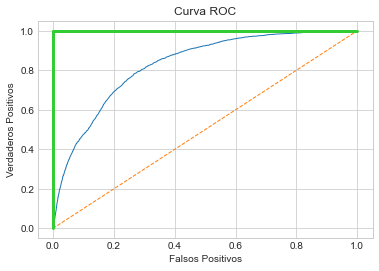

In [1099]:
# Plot ROC curve
plt.title( 'Curva ROC' )
plt.plot(false_positive, true_positive, lw= 1 )#posicion x, y
plt.plot([ 0 , 1 ], ls= "--" , lw= 1 ) # bisectriz
plt.plot([ 0 , 0 ], [ 1 , 0 ] , c= 'limegreen' , lw= 3 ), plt.plot([ 1 , 1 ] ,c= 'limegreen' , lw= 3 )
plt.ylabel( 'Verdaderos Positivos' )
plt.xlabel( 'Falsos Positivos' );

In [1100]:
#Para área bajo de la curva utilizamos el método roc_auc_score en el módulo
#metrics de sklearn . De manera similar a las implementaciones de métricas previas con
#sklearn , el método solicita el vector objetivo verdadero ( y_test ) y nuestras predicciones
#en base al modelo ( yhat ).
roc_auc_score(y_test_2, yhat_2)

0.6712702586142938

# Discusión de las metricas obtenidas para cada modelo.

Resumen de los modelos predictivos propuestos:

*Modelo sin depurar = todos los atributos del df original
*Modelo depurado 1  = solo atributos significativos 
*Modelo depurado 2  = eliminación de atributos mediante el odds ratio + variable no significativa.

     Modelo            Exactitud  Precisión  Recall    F1   Área bajo la curva

1) Modelo sin depurar     0.83       0.73     0.49    0.58      0.71
2) Modelo depurado 1      0.83       0.73     0.49    0.58      0.71
3) Modelo depurado 2      0.80       0.66     0.41    0.51      0.67


-La exactitud reportada para el modelo sin depurar y el depurado 1 sugiere una muy buena exactitud de nuestro modelo, ambas con valor de 0.83. Nuestra medida de exactitud informa que el modelo tiene un desempeño con un 33% superior que una predicción azarosa.  Cuando se realizó la eliminación de odds ratio que no interfieren sobre la probabilidad de ocurrencia, el valor disminuyó a 0.8, una disminución del 3% en principio no significante. Resulta que la medida de exactitud por sí sola es engañosa, dado que no hace distinción alguna frente a errores de tipo Falso Negativo y Falso Positivo. Para ello se utilizarán dos medidas extras: 
● Precisión: mide la fracción de predicciones correctas entre las etiquetas positivas.
● Recall (o sensibilidad) : mide la fracción de verdaderos positivos predichos por el modelo.

-Los puntajes de precisión y recall para el modelo sin depurar y el depurado 1, sugieren que el modelo tiene un desempeño relativamente aceptable, con buen valor de precisión de 0.73 para ambos. Mientras que la proporción de positivos reales identificados correctamente alcanza un valor de 0,49(ambos casos). Para el modelo depurado 2 este valor es mucho menor alcanzando un 0.66 y 0.41 para Recall. Existe un trueque entre Precision y Recall, medida que se conoce como F1, y representa la media armónica entre Precision y Recall.


-F1 alcanza un máximo de 1 cuando Precision y Recall son 1, y 0 cuando Precision o Recall son 0, aún cuando una de las dos medidas sea 1. Al comparar el rendimiento combinado de la precisión y la exhaustividad se obtiene un valor de 0.58, para los primeros dos modelos, mientras que el modelo depurado 2 un 0.51. Aquí es posible observar que al disminuir tanto la precisión como Recall inevitablemente disminuirá F1, lo que se ve reflejado en una menor cantidad de atributos y con ello una menor cantidad de observaciones finales.


-A primera vista un modelo con una capacidad predictiva adecuada debe presentar una curva por sobre la bisectriz, la cual indica la tasa de clasificación aleatoria. Sabemos que el comportamiento deseado de la curva ROC es que tienda a acercarse a la esquina superior izquierda del gráfico, demarcada con verde(presente en todos los gráficos). Para los dos primeros modelos podemos decir que el área bajo la curva se encuentra un 21% sobre la aleatoridad,  mientras que para el modelo depurado 2, disminuye hasta un 17%. Lo anterior se sustenta en que al disminuir la cantidad de datos tambien disminuyó la cantidad los verdaderos positivos acercandose la curva a la bisectriz en un 5%. Finalmente, sabemos que a mayores valores de área bajo la curva, mejor  será el desempeño del modelo para predecir más verdaderos positivos que falsos positivos.